In [1]:
# Using "https://openweathermap.org/api/one-call-api"
# To make the api call, the following format is used as per the websites documentaion;
# https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}
"""Parameters; lat, lon required	Geographical coordinates (latitude, longitude),
appid	required	Your unique API key (you can always find it on your account page under the "API key" tab)
exclude	optional	By using this parameter you can exclude some parts of the weather data from the API response.
It should be a comma-delimited list (without spaces).Available values:current,minutely,hourly,daily,alerts"""

# Import libraries
import requests
import pandas as pd
 
# urls for solar and wind generation data forecast
solar_url = "https://api.openweathermap.org/data/2.5/onecall?lat=-19.461907&lon=142.110216&exclude=[current,minutely,hourly]&appid=c8b03af1f5efccda17ff89c4e0df6b0b"
wind_url="https://api.openweathermap.org/data/2.5/onecall?lat=53.556563&lon=8.598084&exclude=[current,minutely,hourly]&appid=686a8268d2d60adfa1efd1b0f3d7ffe5"

# get daily weather forcast data in json format
jsonData_solar = requests.get(solar_url).json()
jsonData_wind = requests.get(wind_url).json()

In [2]:
print('Solar json data;\n',jsonData_solar,'\n')
print('Wind json data;\n',jsonData_wind)

Solar json data;
 {'lat': -19.4619, 'lon': 142.1102, 'timezone': 'Australia/Brisbane', 'timezone_offset': 36000, 'current': {'dt': 1612290157, 'sunrise': 1612297049, 'sunset': 1612343590, 'temp': 300.55, 'feels_like': 302.18, 'pressure': 1003, 'humidity': 76, 'dew_point': 295.94, 'uvi': 0, 'clouds': 67, 'visibility': 10000, 'wind_speed': 4.99, 'wind_deg': 298, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}, 'hourly': [{'dt': 1612288800, 'temp': 300.55, 'feels_like': 302.18, 'pressure': 1003, 'humidity': 76, 'dew_point': 295.94, 'uvi': 0, 'clouds': 67, 'visibility': 10000, 'wind_speed': 4.99, 'wind_deg': 298, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'pop': 0.38, 'rain': {'1h': 0.29}}, {'dt': 1612292400, 'temp': 300.32, 'feels_like': 303.4, 'pressure': 1003, 'humidity': 77, 'dew_point': 295.94, 'uvi': 0, 'clouds': 34, 'visibility': 10000, 'wind_speed': 2.92, 'wind_deg': 301, 'weather': [{'id': 802, '

In [3]:
# convert the data-interchange format, json, to a pandas data frame for ease of manipulation & use in the regression model
weather_data_solar = pd.DataFrame(jsonData_solar['daily'])
weather_data_wind = pd.DataFrame(jsonData_wind['daily'])
print('Solar;\n',weather_data_solar)
print('\nWind;',weather_data_solar)

Solar;
            dt     sunrise      sunset  \
0  1612317600  1612297049  1612343590   
1  1612404000  1612383483  1612429969   
2  1612490400  1612469918  1612516347   
3  1612576800  1612556351  1612602724   
4  1612663200  1612642785  1612689100   
5  1612749600  1612729218  1612775475   
6  1612836000  1612815650  1612861848   
7  1612922400  1612902082  1612948221   

                                                temp  \
0  {'day': 308.61, 'min': 298.23, 'max': 310.51, ...   
1  {'day': 305.96, 'min': 297.66, 'max': 307.98, ...   
2  {'day': 306.18, 'min': 299.72, 'max': 308.29, ...   
3  {'day': 307.04, 'min': 300.45, 'max': 308.03, ...   
4  {'day': 307.42, 'min': 301.32, 'max': 308.79, ...   
5  {'day': 309.06, 'min': 303.05, 'max': 310.66, ...   
6  {'day': 310.17, 'min': 301.12, 'max': 312.92, ...   
7  {'day': 310, 'min': 301.02, 'max': 310, 'night...   

                                          feels_like  pressure  humidity  \
0  {'day': 309.28, 'night': 297.64, 'eve'

In [4]:
"""for solar Split temp sub columns data (i.e. 'day','min','max', 'eve', 'morn')  into seperate usable columns and merge it to the 
original weather_data_solar frame"""

temp_sub_data=weather_data_solar['temp'].apply(pd.Series)


weather_solar=pd.merge(weather_data_solar, temp_sub_data, right_index=True, left_index=True)
weather_solar

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,...,clouds,pop,rain,uvi,day,min,max,night,eve,morn
0,1612317600,1612297049,1612343590,"{'day': 308.61, 'min': 298.23, 'max': 310.51, ...","{'day': 309.28, 'night': 297.64, 'eve': 308.54...",1004,39,292.77,3.89,345,...,24,0.97,9.95,15.19,308.61,298.23,310.51,298.23,309.08,299.99
1,1612404000,1612383483,1612429969,"{'day': 305.96, 'min': 297.66, 'max': 307.98, ...","{'day': 306.46, 'night': 303.98, 'eve': 308.37...",1005,52,294.86,5.73,343,...,53,0.95,15.39,15.55,305.96,297.66,307.98,301.09,307.50,299.91
2,1612490400,1612469918,1612516347,"{'day': 306.18, 'min': 299.72, 'max': 308.29, ...","{'day': 307.82, 'night': 304.08, 'eve': 311.02...",1005,49,294.33,3.54,11,...,88,0.69,2.59,15.67,306.18,299.72,308.29,303.15,307.51,299.72
3,1612576800,1612556351,1612602724,"{'day': 307.04, 'min': 300.45, 'max': 308.03, ...","{'day': 310.39, 'night': 304.61, 'eve': 309.45...",1003,48,294.53,1.42,310,...,83,0.96,10.19,15.67,307.04,300.45,308.03,302.10,306.59,300.77
4,1612663200,1612642785,1612689100,"{'day': 307.42, 'min': 301.32, 'max': 308.79, ...","{'day': 310.72, 'night': 308.38, 'eve': 310.58...",1002,45,294.13,0.99,142,...,73,0.78,5.46,14.49,307.42,301.32,308.79,305.82,307.87,301.32
5,1612749600,1612729218,1612775475,"{'day': 309.06, 'min': 303.05, 'max': 310.66, ...","{'day': 311.48, 'night': 309.22, 'eve': 311.96...",1001,37,292.36,1.10,3,...,3,0.40,0.21,15.00,309.06,303.05,310.66,308.02,309.49,303.05
6,1612836000,1612815650,1612861848,"{'day': 310.17, 'min': 301.12, 'max': 312.92, ...","{'day': 308.35, 'night': 303.26, 'eve': 307.99...",1000,28,288.74,5.14,114,...,4,0.40,1.03,15.00,310.17,301.12,312.92,304.68,309.66,301.12
7,1612922400,1612902082,1612948221,"{'day': 310, 'min': 301.02, 'max': 310, 'night...","{'day': 307.23, 'night': 300.49, 'eve': 303.16...",1001,31,290.48,7.31,129,...,100,0.00,NaN,15.00,310.00,301.02,310.00,303.24,305.77,301.02


In [5]:
# Extract day and month columns from the weather data similar to the training data
weather_solar['Day']=pd.to_datetime(weather_solar['dt'],unit = 's').dt.day
weather_solar['Month']=pd.to_datetime(weather_solar['dt'],unit = 's').dt.month
weather_data_wind['Day']=pd.to_datetime(weather_data_wind['dt'],unit = 's').dt.day
weather_data_wind['Month']=pd.to_datetime(weather_data_wind['dt'],unit = 's').dt.month
print('Solar;\n',weather_solar)
print('Wind;\n',weather_data_wind)

Solar;
            dt     sunrise      sunset  \
0  1612317600  1612297049  1612343590   
1  1612404000  1612383483  1612429969   
2  1612490400  1612469918  1612516347   
3  1612576800  1612556351  1612602724   
4  1612663200  1612642785  1612689100   
5  1612749600  1612729218  1612775475   
6  1612836000  1612815650  1612861848   
7  1612922400  1612902082  1612948221   

                                                temp  \
0  {'day': 308.61, 'min': 298.23, 'max': 310.51, ...   
1  {'day': 305.96, 'min': 297.66, 'max': 307.98, ...   
2  {'day': 306.18, 'min': 299.72, 'max': 308.29, ...   
3  {'day': 307.04, 'min': 300.45, 'max': 308.03, ...   
4  {'day': 307.42, 'min': 301.32, 'max': 308.79, ...   
5  {'day': 309.06, 'min': 303.05, 'max': 310.66, ...   
6  {'day': 310.17, 'min': 301.12, 'max': 312.92, ...   
7  {'day': 310, 'min': 301.02, 'max': 310, 'night...   

                                          feels_like  pressure  humidity  \
0  {'day': 309.28, 'night': 297.64, 'eve'

In [6]:
# Reduce the 8day forecast to 7 days as required;
weather_solar=weather_solar.iloc[0:7,]
weather_wind=weather_data_wind.iloc[0:7,]
print('Solar;\n',weather_solar)
print('Wind;\n',weather_wind)

Solar;
            dt     sunrise      sunset  \
0  1612317600  1612297049  1612343590   
1  1612404000  1612383483  1612429969   
2  1612490400  1612469918  1612516347   
3  1612576800  1612556351  1612602724   
4  1612663200  1612642785  1612689100   
5  1612749600  1612729218  1612775475   
6  1612836000  1612815650  1612861848   

                                                temp  \
0  {'day': 308.61, 'min': 298.23, 'max': 310.51, ...   
1  {'day': 305.96, 'min': 297.66, 'max': 307.98, ...   
2  {'day': 306.18, 'min': 299.72, 'max': 308.29, ...   
3  {'day': 307.04, 'min': 300.45, 'max': 308.03, ...   
4  {'day': 307.42, 'min': 301.32, 'max': 308.79, ...   
5  {'day': 309.06, 'min': 303.05, 'max': 310.66, ...   
6  {'day': 310.17, 'min': 301.12, 'max': 312.92, ...   

                                          feels_like  pressure  humidity  \
0  {'day': 309.28, 'night': 297.64, 'eve': 308.54...      1004        39   
1  {'day': 306.46, 'night': 303.98, 'eve': 308.37...      1005

In [7]:
# Print columns to have an idea of the attributes of the weather

print(weather_solar.columns)
print(weather_wind.columns)

Index(['dt', 'sunrise', 'sunset', 'temp', 'feels_like', 'pressure', 'humidity',
       'dew_point', 'wind_speed', 'wind_deg', 'weather', 'clouds', 'pop',
       'rain', 'uvi', 'day', 'min', 'max', 'night', 'eve', 'morn', 'Day',
       'Month'],
      dtype='object')
Index(['dt', 'sunrise', 'sunset', 'temp', 'feels_like', 'pressure', 'humidity',
       'dew_point', 'wind_speed', 'wind_deg', 'weather', 'clouds', 'pop',
       'snow', 'uvi', 'rain', 'Day', 'Month'],
      dtype='object')


In [8]:
# weather_solar['rain'].describe # No data on rain

In [9]:
"""Required columns for solar attributes (X)=['Day', 'Solar', 'Cloud Cover Percentage', 
'Month_number','Temp Hi(float)', 'Temp Low(Float)']"""

"""Required columns for wind attributes (X1)=['Day', 'Month_number', 'wind speed', 'direction']"""

weather_solar=weather_solar[['Day','uvi','clouds','Month','max','min']]
weather_wind=weather_wind[['Day', 'Month', 'wind_speed', 'wind_deg']]

print(weather_solar)
print(weather_wind)

   Day    uvi  clouds  Month     max     min
0    3  15.19      24      2  310.51  298.23
1    4  15.55      53      2  307.98  297.66
2    5  15.67      88      2  308.29  299.72
3    6  15.67      83      2  308.03  300.45
4    7  14.49      73      2  308.79  301.32
5    8  15.00       3      2  310.66  303.05
6    9  15.00       4      2  312.92  301.12
   Day  Month  wind_speed  wind_deg
0    2      2        1.86       141
1    3      2        2.53        84
2    4      2        5.00       113
3    5      2        6.15       119
4    6      2        9.62        89
5    7      2       11.44        92
6    8      2        5.20        97


In [10]:
# Rename columns to match Training data columns
solar=weather_solar.rename(columns={"uvi":"Solar","clouds":"Cloud Cover Percentage","Month": "Month_number",
                            "max": "Temp Hi(float)","min": "Temp Low(Float)"})
wind=weather_wind.rename(columns={"Month": "Month_number","wind_speed": "wind speed","wind_deg": "direction"})
print('\nSolar;\n',solar)
print('\nWind;\n',wind)


Solar;
    Day  Solar  Cloud Cover Percentage  Month_number  Temp Hi(float)  \
0    3  15.19                      24             2          310.51   
1    4  15.55                      53             2          307.98   
2    5  15.67                      88             2          308.29   
3    6  15.67                      83             2          308.03   
4    7  14.49                      73             2          308.79   
5    8  15.00                       3             2          310.66   
6    9  15.00                       4             2          312.92   

   Temp Low(Float)  
0           298.23  
1           297.66  
2           299.72  
3           300.45  
4           301.32  
5           303.05  
6           301.12  

Wind;
    Day  Month_number  wind speed  direction
0    2             2        1.86        141
1    3             2        2.53         84
2    4             2        5.00        113
3    5             2        6.15        119
4    6             2      

In [11]:
# import libraries
import base64
import datetime
import io
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import pickle


In [12]:
# solar,wind

In [13]:
# Creating an Interactive Data app using Plotly’s Dash

""" Resources; https://dash.plotly.com/external-resources
https://towardsdatascience.com/creating-an-interactive-data-app-using-plotlys-dash-356428b4699c"""

# Styling

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

colors = {
    "graphBackground": "#F5F5F5",
    "background": "#ffffff",
    "text": "#000000"
}


In [14]:
# Load Saved Model i.e. the solar and wind model in .pkl format
model = pickle.load(open('solar_model.pkl','rb'))
model1 = pickle.load(open('wind_model.pkl','rb'))
print(model,'\n',model1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False) 
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [15]:
# HTML
app.layout = html.Div([
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Upload Maintenance Schedule Files for Solar & Wind Farms')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': 'auto'
        },
        # Allow multiple files to be uploaded
        multiple=True
    ),dcc.Graph(id='Mygraph'),
    dcc.Graph(id='Mygraph1'),
],style={'height':'20px','width':'60%','margin-left':'auto',
'margin-right':'auto','margin-top': 'auto','margin-bottom': 'auto'})



In [16]:
# Function for Parsing uploaded maintenance schedule files
def parse_data(contents, filename):
    content_type, content_string = contents.split(',')

    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            # Assuming that the user uploaded a CSV file
            df = pd.read_csv(
                io.StringIO(decoded.decode('utf-8')))


        elif 'xls' in filename:
            # Assuming that the user uploaded an excel file
            df = pd.read_excel(io.BytesIO(decoded))
    except Exception as e:
        print(e)
        return html.Div([
            'Wrong Filetype For Maintenance File'
        ])
    return df

   Day  Solar  Cloud Cover Percentage  Month_number  Temp Hi(float)  \
0    3  15.19                      24             2          310.51   
1    4  15.55                      53             2          307.98   
2    5  15.67                      88             2          308.29   
3    6  15.67                      83             2          308.03   
4    7  14.49                      73             2          308.79   
5    8  15.00                       3             2          310.66   
6    9  15.00                       4             2          312.92   

   Temp Low(Float)  Predicted power output(MW)  Capacity Available  
0           298.23                    5.064667                 NaN  
1           297.66                    5.099333                 3.0  
2           299.72                    5.099333                 NaN  
3           300.45                    5.099333                 5.0  
4           301.32                    5.014333                 NaN  
5           303.0

Text(0, 0.5, 'Power (MW)')

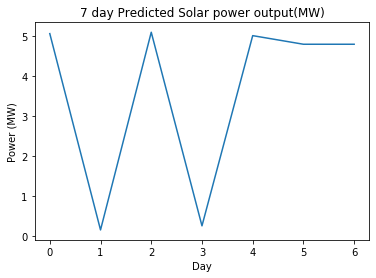

In [17]:
# Testing of some codes of lines that will used to create the function for the
# solar output prediction

"""retrieve data from the solar_wind()function, which loads 7 day forecasts from the weather api in the desired 
# data frame column formats for solar and wind """
solar_weather_forecast=solar
# print(solar_weather_forecast,wind_weather_forecast) # confirmed successfull loading of the next 7 days weather forecast data

# predict solar output
solar_predicted_output = model.predict(solar_weather_forecast) 
# print(solar_predicted_output) # output confirmed

# merge the predicted power output with the forcast data
solar_weather_forecast["Predicted power output(MW)"]=pd.Series(solar_predicted_output)
# print(solar_weather_forecast) # confirmed

# rename "Date Of Month" to "Day" for maintenance schedule
solar_monthly_schedule=pd.read_csv('solar_farm.csv', skiprows=1)
maint=solar_monthly_schedule.rename(columns={"Date Of Month":"Day"})
# print(maint) # confirmed

""" map the % capacity available from the maintenance schedule to the solar forecast & predicted power dataframe 
with common column="Day" """
solar_final=pd.merge(solar_weather_forecast, maintenance,how='left')
print(solar_final) # confirmed

# fill missing values with 100, meaning available capacity when there is no planned maintenace is 100% of the predicted output
solar_final=solar_final.fillna(100)
# print(solar_final) # confirmed

# Derate the predicted output by the % capacity available
solar_final['Predicted power output(MW)']=solar_final['Predicted power output(MW)']*(solar_final['Capacity Available']/100)
# print(solar_final) # confirmed
  

# # Plot Line graph using plotly express 
# import plotly.express as px
# fig = px.line(solar_final, x=solar_final.index, y="Predicted power output(MW)",
#                       title='7 day Predicted Solar power output(MW)',labels={"index": "Day"})

# Plot Line graph
import matplotlib.pyplot as plt
plt.plot(solar_final.index,solar_final['Predicted power output(MW)'])
plt.title("7 day Predicted Solar power output(MW)")
plt.xlabel("Day")
plt.ylabel("Predicted power output(MW)");
plt.ylabel("Power (MW)")



In [22]:
# Testing of some codes of lines that will used to create the function for the wind
# output prediction

"""retrieve data from the wind_wind()function, which loads 7 day forecasts from 
the weather api in the desired data frame column formats for wind and wind """
wind_weather_forecast=wind
# print(solar_weather_forecast,wind_weather_forecast) # confirmed successfull loading of the next 7 days weather forecast data

# predict wind output
wind_predicted_output = model1.predict(wind_weather_forecast) 
# print(wind_predicted_output) # output confirmed

# # merge the predicted power output with the forcast data
wind_weather_forecast["Predicted power output(MW)"]=pd.Series(wind_predicted_output)
# print(wind_weather_forecast) # confirmed

# rename "Date Of Month" to "Day" for maintenance schedule
wind_monthly_schedule=pd.read_csv('wind_farm.csv', skiprows=1)
maint=wind_monthly_schedule.rename(columns={"Date Of Month":"Day"})
# print(maint) # confirmed

""" map the % capacity available from the maintenance schedule to the wind forecast & predicted power dataframe 
with common column="Day" """
wind_final=pd.merge(wind_weather_forecast, maint,how='left')
# print(wind_final) # confirmed

# fill missing values with 100, meaning available capacity when there is no planned maintenace is 100% of the predicted output
wind_final=wind_final.fillna(100)
# print(wind_final) # confirmed

# Derate the predicted output by the % capacity available
wind_final['Predicted power output(MW)']=wind_final['Predicted power output(MW)']*(wind_final['Capacity Available']/100)
print(wind_final) # confirmed
  
# # Prepare columns for plotting    
# wind_final=wind_final[['Month_number','Day','Predicted power output(MW)']]
# print(wind_final)

# # # Plot Line graph using plotly express 
# # import plotly.express as px
# # fig = px.line(wind_final, x=wind_final.index, y="Predicted power output(MW)",
# #                       title='7 day Predicted wind power output(MW)',labels={"index": "Day"})

# Plot Line graph
import matplotlib.pyplot as plt
plt.plot(wind_final.index,wind_final['Predicted power output(MW)'])
plt.title("7 day Predicted wind power output(MW)")
plt.xlabel("Day")
plt.ylabel("Power (MW)")

    3  70
0   5  60
1   7  50
2   8  45
3  15  55
4  24  90
5  28  30


In [ ]:
""" Callback for solar generation for uploading solar farm maintenance schedule and plotting predicted wind
power output"""
# Reference on plots using plotly express[ https://plotly.com/python/line-charts/]

@app.callback(Output('Mygraph', 'figure'),
            [
                Input('upload-data', 'contents'),
                Input('upload-data', 'filename')
            ])
# Create Function for Solar Predictions and output visualization
def update_graph(contents, filename):
    fig = {
        'layout': go.Layout(
            plot_bgcolor=colors["graphBackground"],
            paper_bgcolor=colors["graphBackground"])
    }

    if contents:
        contents = contents[0]
        filename = filename[0]
        df = parse_data(contents, filename)
        
        """retrieve data from the solar_wind()function, which loads 7 day forecasts from the
        weather api in the desired data frame column formats for solar and wind """
        solar_weather_forecast,wind_weather_forecast=solar_wind()
        # print(solar_weather_forecast,wind_weather_forecast) # confirmed successfull loading of the next 7 days weather forecast data

        # predict solar output
        solar_predicted_output = model.predict(solar_weather_forecast) 
        # print(solar_predicted_output) # output confirmed

        # merge the predicted power output with the forcast data
        solar_weather_forecast["Predicted power output(MW)"]=pd.Series(solar_predicted_output)
        # print(solar_weather_forecast) # confirmed

        # rename "Date Of Month" to "Day" for maintenance schedule
#         solar_monthly_schedule=pd.read_csv('solar_farm.csv', skiprows=1)
        
        df.to_csv('sol_maint.csv',index=False)
        df=pd.read_csv('sol_maint.csv')
        maint=df.rename(columns={"Date Of Month":"Day"})
       
        # print(maint) # confirmed

        """ map the % capacity available from the maintenance schedule to the solar forecast & predicted power dataframe 
        with common column="Day" """
        solar_final=pd.merge(solar_weather_forecast, maint,how='left')
        # print(df_sol_final) # confirmed

        # fill missing values with 100, meaning available capacity when there is no planned maintenace is 100% of the predicted output
        solar_final=solar_final.fillna(100)
        # print(solar_final) # confirmed

        # Derate the predicted output by the % capacity available
        solar_final['Predicted power output(MW)']=solar_final['Predicted power output(MW)']*(solar_final['Capacity Available']/100)
        # print(solar_final) # confirmed

        # Prepare columns for plotting    
        solar_final=solar_final[['Month_number','Day','Predicted power output(MW)']]
        # print(solar_final) # confirmed

        # # Plot Line graph using plotly express        
        fig = px.line(solar_final, x=solar_final.index, y="Predicted power output(MW)",
                      title='7 day Predicted Solar power output(MW)',labels={"index": "Day"})
#         fig.show()

        dcc.Graph(figure=fig)
 
    return fig        

if __name__ == '__main__':
#     app.run_server(debug=True)
    app.run_server(debug=False)


In [ ]:
""" Callback for wind generation for uploading wind farm maintenance schedule and plotting predicted
wind power output"""
# Reference on plots using plotly express[ https://plotly.com/python/line-charts/]
@app.callback(Output('Mygraph1', 'figure'),
            [
                Input('upload-data', 'contents'),
                Input('upload-data', 'filename')
            ])
def update_graph1(contents, filename):
    fig1 = {
        'layout': go.Layout(
            plot_bgcolor=colors["graphBackground"],
            paper_bgcolor=colors["graphBackground"])
    }

    if contents:
        contents = contents[0]
        filename = filename[0]
        df = parse_data(contents, filename)
        
        """retrieve data from the solar_wind()function, which loads 7 day forecasts from the 
        weather api in the desired data frame column formats for solar and wind """
        solar_weather_forecast,wind_weather_forecast=solar_wind()

        # predict wind output
        wind_predicted_output = model1.predict(wind_weather_forecast) 
        
        # merge the predicted power output with the forcast data
        wind_weather_forecast["Predicted power output(MW)"]=pd.Series(wind_predicted_output)
        
        # rename "Date Of Month" to "Day" for maintenance schedule
#         wind_monthly_schedule=pd.read_csv('wind_farm.csv', skiprows=1)
        df.to_csv('wind_maint.csv',index=False)
        df=pd.read_csv('wind_maint.csv', skiprows=1)
        maint1=df.rename(columns={"Date Of Month":"Day"})
        # print(maint1) # confirmed

        """ map the % capacity available from the maintenance schedule to the wind forecast & predicted power dataframe 
        with common column="Day" """
        wind_final=pd.merge(wind_weather_forecast, maint1,how='left')
        # print(wind_final) # confirmed

        # fill missing values with 100, meaning available capacity when there is no planned maintenace is 100% of the predicted output
        wind_final=wind_final.fillna(100)
        # print(wind_final) # confirmed

        # Derate the predicted output by the % capacity available
        wind_final['Predicted power output(MW)']=wind_final['Predicted power output(MW)']*(wind_final['Capacity Available']/100)
        # print(wind_final) # confirmed

        # Prepare columns for plotting    
        wind_final=wind_final[['Month_number','Day','Predicted power output(MW)']]
        # print(wind_final) # confirmed

        # Plot Line graph using plotly express
        fig1 = px.line(wind_final, x=wind_final.index, y="Predicted power output(MW)",
                      title='7 day Predicted Wind power output(MW)',labels={"index": "Day"})
#         fig.show()

        dcc.Graph(figure=fig1)
 
    return fig1        

if __name__ == '__main__':
#     app.run_server(debug=True)
    app.run_server(debug=False)

 

In [ ]:
# Combining the two callback for solar and wind;
""" Callback for solar generation for uploading solar farm maintenance schedule and plotting predicted wind
power output"""
# Reference on plots using plotly express[ https://plotly.com/python/line-charts/]

@app.callback(Output('Mygraph', 'figure'),
            [
                Input('upload-data', 'contents'),
                Input('upload-data', 'filename')
            ])
# Create Function for Solar Predictions and output visualization
def update_graph(contents, filename):
    fig = {
        'layout': go.Layout(
            plot_bgcolor=colors["graphBackground"],
            paper_bgcolor=colors["graphBackground"])
    }

    if contents:
        contents = contents[0]
        filename = filename[0]
        df = parse_data(contents, filename)
        
        """retrieve data from the solar_wind()function, which loads 7 day forecasts from the
        weather api in the desired data frame column formats for solar and wind """
        solar_weather_forecast,wind_weather_forecast=solar_wind()
        # print(solar_weather_forecast,wind_weather_forecast) # confirmed successfull loading of the next 7 days weather forecast data

        # predict solar output
        solar_predicted_output = model.predict(solar_weather_forecast) 
        # print(solar_predicted_output) # output confirmed

        # merge the predicted power output with the forcast data
        solar_weather_forecast["Predicted power output(MW)"]=pd.Series(solar_predicted_output)
        # print(solar_weather_forecast) # confirmed

        # rename "Date Of Month" to "Day" for maintenance schedule
#         solar_monthly_schedule=pd.read_csv('solar_farm.csv', skiprows=1)
        
        df.to_csv('sol_maint.csv',index=False)
        df=pd.read_csv('sol_maint.csv',skiprows=1)
        maint=df.rename(columns={"Date Of Month":"Day"})
       
        # print(maint) # confirmed

        """ map the % capacity available from the maintenance schedule to the solar forecast & predicted power dataframe 
        with common column="Day" """
        solar_final=pd.merge(solar_weather_forecast, maint,how='left')
        # print(df_sol_final) # confirmed

        # fill missing values with 100, meaning available capacity when there is no planned maintenace is 100% of the predicted output
        solar_final=solar_final.fillna(100)
        # print(solar_final) # confirmed

        # Derate the predicted output by the % capacity available
        solar_final['Predicted power output(MW)']=solar_final['Predicted power output(MW)']*(solar_final['Capacity Available']/100)
        # print(solar_final) # confirmed

        # Prepare columns for plotting    
        solar_final=solar_final[['Month_number','Day','Predicted power output(MW)']]
        # print(solar_final) # confirmed

        # # Plot Line graph using plotly express        
        fig = px.line(solar_final, x=solar_final.index, y="Predicted power output(MW)",
                      title='7 day Predicted Solar power output(MW)',labels={"index": "Day"})
#         fig.show()

        dcc.Graph(figure=fig)
 
    return fig        

""" Callback for wind generation for uploading wind farm maintenance schedule and plotting predicted
wind power output"""
# Reference on plots using plotly express[ https://plotly.com/python/line-charts/]
@app.callback(Output('Mygraph1', 'figure'),
            [
                Input('upload-data', 'contents'),
                Input('upload-data', 'filename')
            ])
def update_graph1(contents, filename):
    fig1 = {
        'layout': go.Layout(
            plot_bgcolor=colors["graphBackground"],
            paper_bgcolor=colors["graphBackground"])
    }

    if contents:
        contents = contents[0]
        filename = filename[0]
        df = parse_data(contents, filename)
        
        """retrieve data from the solar_wind()function, which loads 7 day forecasts from the 
        weather api in the desired data frame column formats for solar and wind """
        solar_weather_forecast,wind_weather_forecast=solar_wind()

        # predict wind output
        wind_predicted_output = model1.predict(wind_weather_forecast) 
        
        # merge the predicted power output with the forcast data
        wind_weather_forecast["Predicted power output(MW)"]=pd.Series(wind_predicted_output)
        
        # rename "Date Of Month" to "Day" for maintenance schedule
#         wind_monthly_schedule=pd.read_csv('wind_farm.csv', skiprows=1)


        df.to_csv('wind_maint.csv',index=False)
        df=pd.read_csv('wind_maint.csv',skiprows=1) 
        maint1=df.rename(columns={"Date Of Month":"Day"})
        # print(maint1) # confirmed

        """ map the % capacity available from the maintenance schedule to the wind forecast & predicted power dataframe 
        with common column="Day" """
        wind_final=pd.merge(wind_weather_forecast, maint1,how='left')
        # print(wind_final) # confirmed

        # fill missing values with 100, meaning available capacity when there is no planned maintenace is 100% of the predicted output
        wind_final=wind_final.fillna(100)
        # print(wind_final) # confirmed

        # Derate the predicted output by the % capacity available
        wind_final['Predicted power output(MW)']=wind_final['Predicted power output(MW)']*(wind_final['Capacity Available']/100)
        # print(wind_final) # confirmed

        # Prepare columns for plotting    
        wind_final=wind_final[['Month_number','Day','Predicted power output(MW)']]
        # print(wind_final) # confirmed

        # Plot Line graph using plotly express
        fig1 = px.line(wind_final, x=wind_final.index, y="Predicted power output(MW)",
                      title='7 day Predicted Wind power output(MW)',labels={"index": "Day"})
#         fig.show()

        dcc.Graph(figure=fig1)
 
    return fig1        

if __name__ == '__main__':
#     app.run_server(debug=True)
    app.run_server(debug=False)

